In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [3]:
train = pd.read_csv('./database/train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
'''
EDA Steps:
1) NaN Features
2) Numerical Features > Temporal, Discrete, Continuous
3) Categorical Features

'''

# NaN Features

In [5]:
nan_features = [f for f in train.columns if train[f].isnull().sum() > 1]
print('Total number of features having NaN Vals :', len(nan_features), '\n')

nan_percentage = [train[f].isnull().sum()/len(train) * 100 for f in nan_features]

for idx, f in enumerate(nan_features):
    print(f'NaN Percentage in Feature > {f} :', nan_percentage[idx], '%')

Total number of features having NaN Vals : 3 

NaN Percentage in Feature > Age : 19.865319865319865 %
NaN Percentage in Feature > Cabin : 77.10437710437711 %
NaN Percentage in Feature > Embarked : 0.22446689113355783 %


### Relation of NaN Features with the Target Feature

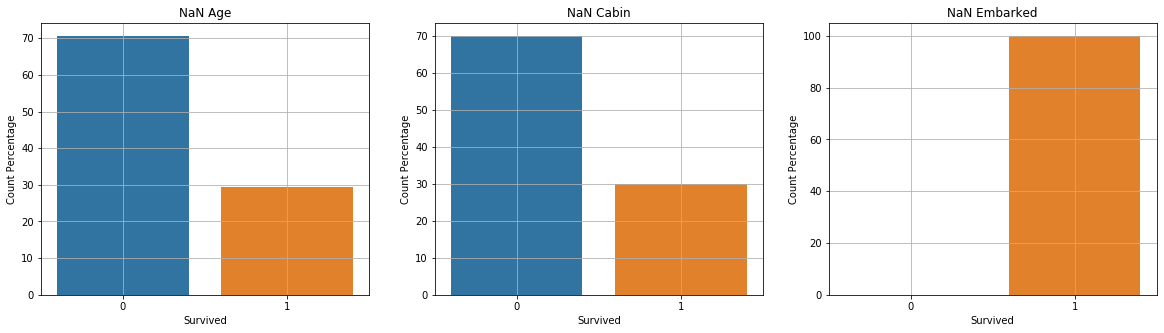

In [6]:
plt.figure(figsize=(20, 5))
for idx, f in enumerate(nan_features):
    data = train.copy()
    
    plt.subplot(1, 3, idx+1)
    
    survived = data[data[f].isnull()]['Survived'].sum()*100 / data[f].isnull().sum()
    not_survived = 100 - survived
    plot = sns.barplot(['1', '0'], [survived, not_survived])
    
    plt.ylabel('Count Percentage')
    plt.xlabel('Survived')
    plt.title('NaN '+f)
    plt.grid(1)

# Numerical Features

In [7]:
num_features = [f for f in train.columns if train[f].dtype != 'O' and f not in ['PassengerId', 'Survived']]

print('Total number of Numerical features :', len(num_features), '\n')

Total number of Numerical features : 5 



### Discrete Numerical Features

In [9]:
discrete_features = [f for f in num_features if len(train[f].unique()) < 25]
print('Total number of Discrete-Numerical features :', len(discrete_features), '\n')

# Relationship with Target Feature

# plt.figure(figsize=(20, 5))
# # fig, axes = plt.subplots(nrows=1, ncols=len(discrete_features))
# for idx, f in enumerate(discrete_features):
# #     print(f)
#     data = train.copy()
#     survived = data.groupby(f)['Survived'].sum()    
#     not_survived = data.groupby(f)['Survived'].count() - survived

#     df = pd.concat([pd.DataFrame(survived), pd.DataFrame(not_survived)], axis=1)
#     df.columns = ['Survived', 'Not Survived']
    
#     plt.subplot(1, 3, idx+1)
#     df.plot(kind='bar')
    
#     plt.ylabel('Count Percentage')
#     plt.xlabel('Classes')
#     plt.title('NaN '+f)
#     plt.grid(1)


Total number of Discrete-Numerical features : 3 



### Continuous Numerical Features

Total number of Continuous-Numerical features : 2 



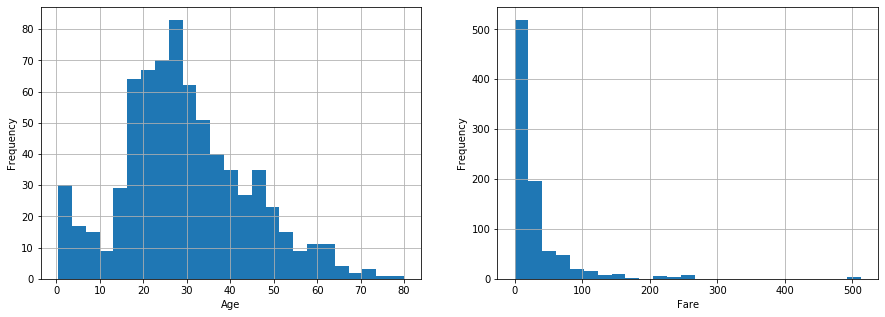

In [10]:
cont_features = [f for f in num_features if f not in discrete_features]
print('Total number of Continuous-Numerical features :', len(cont_features), '\n')

plt.figure(figsize=(15, 5))
for idx, f in enumerate(cont_features):
    data = train.copy()
    
    plt.subplot(1, 2, idx+1)
    data[f].hist(bins=25)
    plt.ylabel('Frequency')
    plt.xlabel(f)

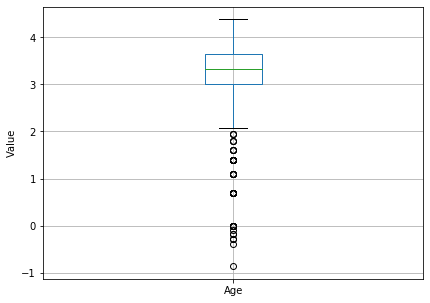

In [11]:
plt.figure(figsize=(15, 5))
for idx, f in enumerate(cont_features):
    if 0 not in train[f].unique():
        data = train.copy()
        
        data[f] = np.log(data[f])
        
        plt.subplot(1, 2, idx+1)
        data.boxplot(f)
        plt.ylabel('Value')

We can see there are a lot of outliers in this Feature.

# Categorical Features

In [24]:
cat_features = [f for f in train.columns if train[f].dtype == 'O' and f !='Name']
print('Total number of Categorical features :', len(cat_features), '\n')

Total number of Categorical features : 4 



In [28]:
for f in cat_features:
    print(f'Unique Classes of Feature > {f} :', len(train[f].unique()))

Unique Classes of Feature > Sex : 2
Unique Classes of Feature > Ticket : 681
Unique Classes of Feature > Cabin : 148
Unique Classes of Feature > Embarked : 4


In [37]:
cat_features

['Sex', 'Ticket', 'Cabin', 'Embarked']

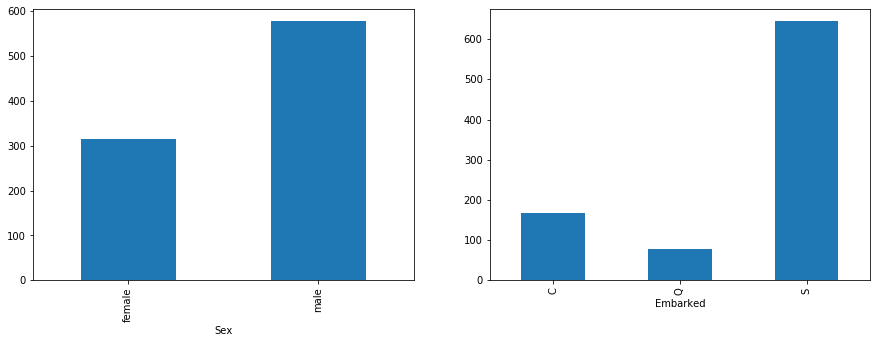

In [44]:
idx = 1
plt.figure(figsize=(15, 5))
for f in ['Sex', 'Embarked']:
    plt.subplot(1, 2, idx)
    idx += 1
    train.groupby(f)['Survived'].count().plot.bar()